In [1]:
import pandas as pd
import numpy as np


from sklearn.naive_bayes import GaussianNB
import sklearn.pipeline
import sklearn.grid_search
import sklearn.metrics
import sklearn.cross_validation as crossval

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/arjoonn/dev/kaggle/env/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
gpa = pd.read_csv('gpa.csv')
gpa = gpa.drop('slno', 1)

gpa['class'] = gpa['class'].map({6.5: 0, 7.5: 1, 8.5: 2})
gpa.info()
gpa.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 5 columns):
S1       132 non-null float64
S2       132 non-null float64
S3       132 non-null float64
S4       132 non-null float64
class    132 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


,S1,S2,S3,S4,class
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,7.006439,6.958864,7.093561,6.469697,0.969697
std,0.841445,0.794846,0.828554,0.780872,0.780872
min,5.500000,5.500000,5.500000,5.500000,0.000000
25%,6.465000,6.400000,6.685000,5.500000,0.000000
50%,6.895000,6.900000,7.150000,6.500000,1.000000
75%,7.600000,7.562500,7.625000,7.500000,2.000000
max,8.960000,8.800000,9.010000,7.500000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xae22d9ec>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xadf7f04c>]], dtype=object)

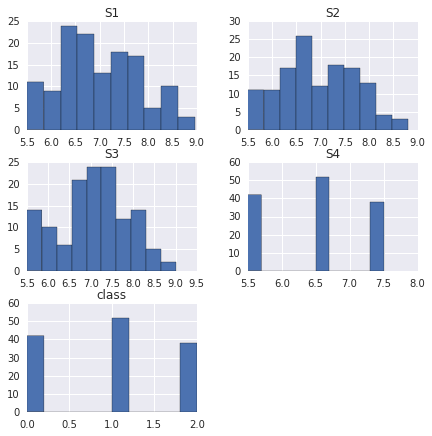

In [13]:
gpa.hist(figsize=(7, 7))

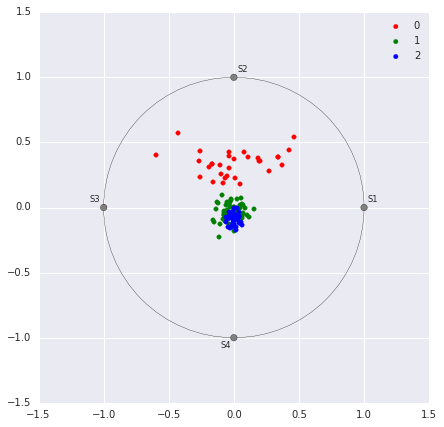

In [14]:
plt.figure(figsize=(7, 7))
pd.tools.plotting.radviz(gpa, 'class', color=['r', 'g', 'b'])

In [22]:
clf = GaussianNB()
score = crossval.cross_val_score(clf, gpa.drop('class', 1), gpa['class'], scoring='accuracy')
print(score)

[ 1.  1.  1.]
